<a href="https://colab.research.google.com/github/rasyidfirdaus482/Data-Classification-Summarization-with-IBM-Granite/blob/main/klasifikasi_dan_ringkasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAPSTONE PROJECT:
###IMDB MOVIE REVIEW SENTIMENT ANALYSIS
###Using IBM Granite Models for Classification & Summarization

---
# 1. PROJECT OVERVIEW & PROBLEM STATEMENT
### PERNYATAAN MASALAH:

1. Tantangan Klasifikasi: Menganalisis pola sentimen dalam ulasan film dengan akurasi tinggi

2. Tantangan Ringkasan: Mengekstrak tema utama dan insight dari kumpulan ulasan yang besar

3. Kecerdasan Bisnis: Memberikan rekomendasi yang dapat ditindaklanjuti bagi pembuat film

### METODOLOGI:

1. Menggunakan IBM Granite untuk klasifikasi teks dan peringkasan lanjutan

2. Menerapkan pipeline analisis data yang komprehensif

3. Menghasilkan insight dan rekomendasi siap pakai untuk bisnis

### HASIL YANG DIHARAPKAN:

1. Melakukan klasifikasi sentimen dengan akurasi tinggi

2. Membuat Ringkasan insight secara otomatis

3. Rekomendasi berbasis data untuk para pemangku kepentingan

In [2]:
# Install required packages
!pip install pandas numpy matplotlib seaborn wordcloud scikit-learn
!pip install requests beautifulsoup4 plotly
!pip install langchain_community
!pip install replicate

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import requests
import json

warnings.filterwarnings('ignore')
plt.style.use('default')

print("🎬 IMDB Sentiment Analysis Capstone Project")
print("=" * 50)
print("📊 Using IBM Granite Models for Advanced Text Analytics")
print("=" * 50)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.5 MB/s eta 0:00:00
🎬 IMDB Sentiment Analysis Capstone Project
📊 Using IBM Granite Models for Advanced Text Analytics


# 2. DATA LOADING & INITIAL EXPLORATION

In [3]:
print("\n📁 LOADING IMDB DATASET...")

# Load the IMDB dataset
try:
    # If you have the dataset file
    # Adding engine='python', quotechar='"', and on_bad_lines='skip' to handle potential parsing errors
    df = pd.read_csv('IMDB Dataset.csv', engine='python', quotechar='"', on_bad_lines='skip')
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Shape: {df.shape}")
    print(f"📝 Columns: {df.columns.tolist()}")

except FileNotFoundError:
    print("⚠️ Dataset not found. Creating sample data for demonstration...")
    # Data sample untuk demo awal
    sample_reviews = [
        "This movie was absolutely fantastic! Great acting and storyline.",
        "Terrible movie, waste of time. Poor acting and boring plot.",
        "Amazing cinematography and brilliant performances by all actors.",
        "Not worth watching. Very disappointing and predictable ending.",
        "One of the best films I've ever seen! Highly recommended.",
        "Boring and slow-paced. Couldn't keep my attention at all."
    ]
    sample_sentiments = ["positive", "negative", "positive", "negative", "positive", "negative"]

    df = pd.DataFrame({
        'review': sample_reviews,
        'sentiment': sample_sentiments
    })
    print("📊 Using sample data for demonstration")

print("\n📊 DATASET OVERVIEW:")
print(f"Total Reviews: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())


📁 LOADING IMDB DATASET...
✅ Dataset loaded successfully!
📊 Shape: (50000, 2)
📝 Columns: ['review', 'sentiment']

📊 DATASET OVERVIEW:
Total Reviews: 50000
Columns: ['review', 'sentiment']

First few rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


# 3. EXPLORATORY DATA ANALYSIS (EDA)



📈 EXPLORATORY DATA ANALYSIS

📋 Basic Dataset Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

📊 Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


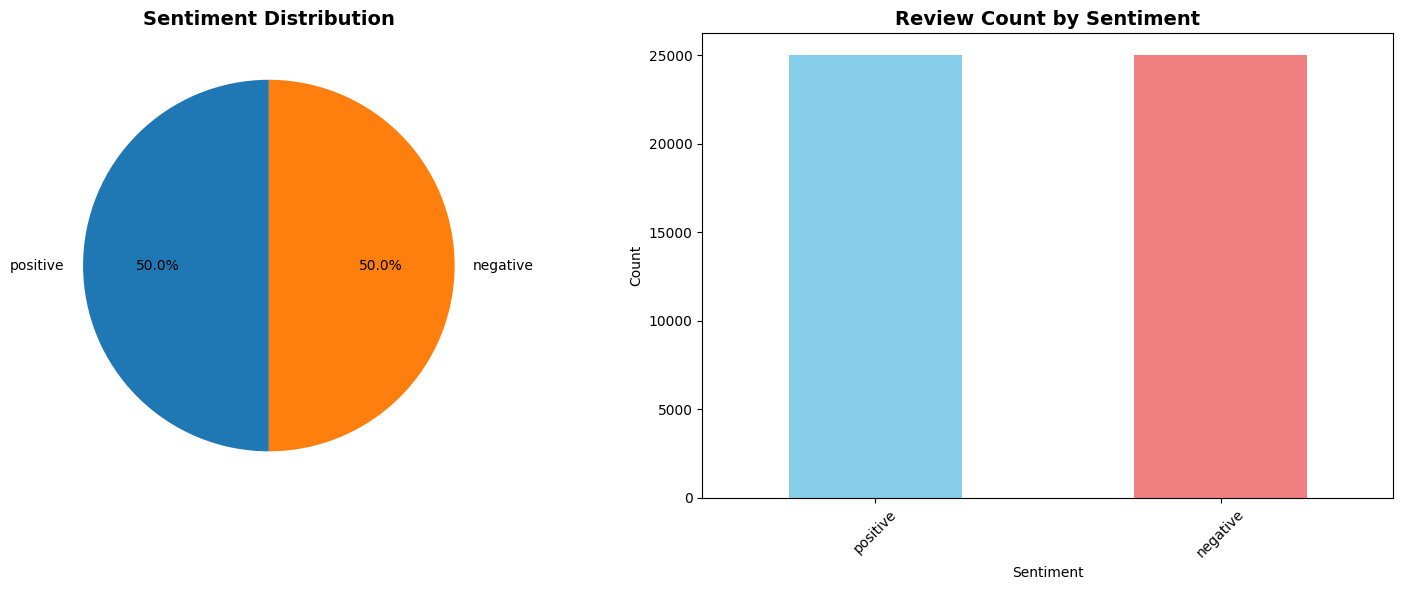


📝 Text Length Statistics:
Average review length: 1309.4 characters
Average word count: 231.2 words


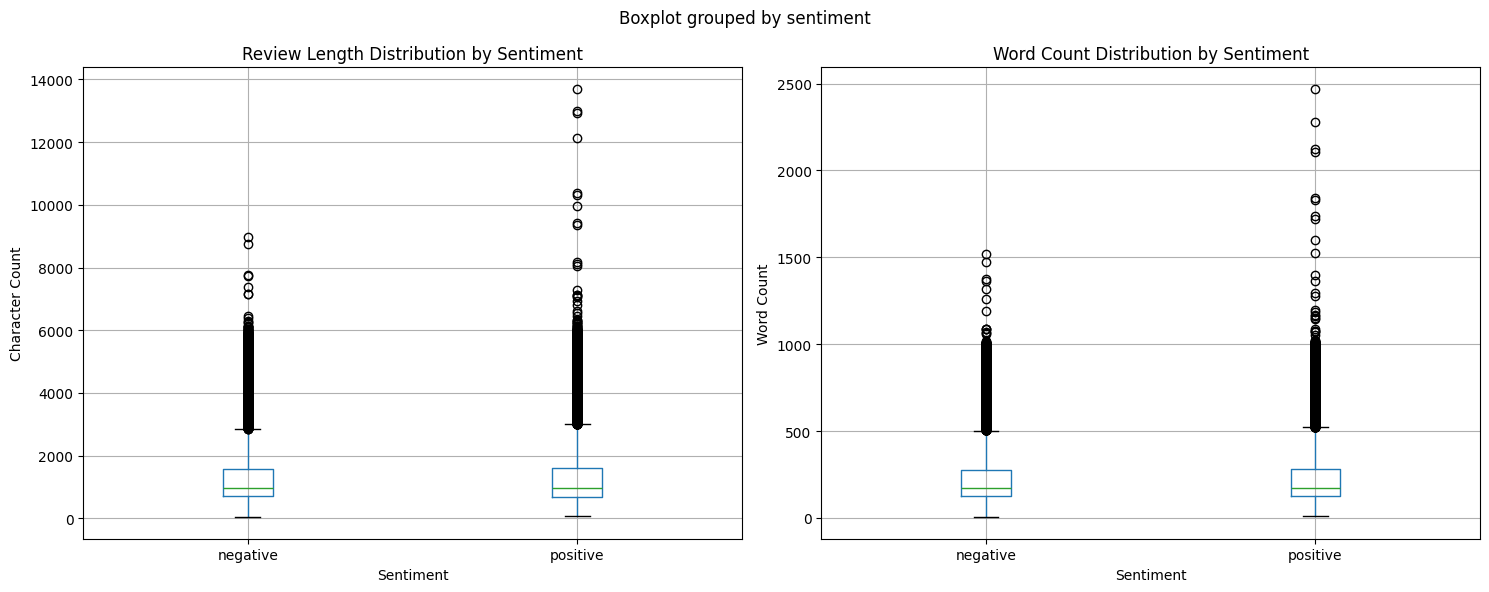

In [4]:
print("\n📈 EXPLORATORY DATA ANALYSIS")
print("=" * 40)

# Basic statistics
print("\n📋 Basic Dataset Statistics:")
print(df.info())
print("\n📊 Sentiment Distribution:")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')

# Bar chart
sentiment_counts.plot(kind='bar', ax=axes[1], color=['skyblue', 'lightcoral'])
axes[1].set_title('Review Count by Sentiment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Text length analysis
df['review_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

print(f"\n📝 Text Length Statistics:")
print(f"Average review length: {df['review_length'].mean():.1f} characters")
print(f"Average word count: {df['word_count'].mean():.1f} words")

# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Review length distribution
df.boxplot(column='review_length', by='sentiment', ax=axes[0])
axes[0].set_title('Review Length Distribution by Sentiment')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Character Count')

# Word count distribution
df.boxplot(column='word_count', by='sentiment', ax=axes[1])
axes[1].set_title('Word Count Distribution by Sentiment')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Word Count')

plt.tight_layout()
plt.show()

# 4. TEXT PREPROCESSING

In [5]:
print("\n🔧 TEXT PREPROCESSING")
print("=" * 30)

def preprocess_text(text):
    """
    Comprehensive text preprocessing function
    """
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters but keep spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("✅ Text preprocessing completed!")
print("\nExample of preprocessing:")
print(f"Original: {df['review'].iloc[0]}")
print(f"Cleaned:  {df['cleaned_review'].iloc[0]}")



🔧 TEXT PREPROCESSING
✅ Text preprocessing completed!

Example of preprocessing:
Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreemen

# 5. IBM GRANITE + REPLICATE + LANGCHAIN INTEGRATION (FIXED)

In [6]:
import os
from google.colab import userdata
from langchain_community.llms import Replicate

print("\n🤖 IBM GRANITE VIA REPLICATE & LANGCHAIN")
print("=" * 40)

def initialize_llm():
    """
    Mengambil API token dari Colab secrets dan menginisialisasi model LLM.
    """
    try:
        api_token = userdata.get('REPLICATE_API_TOKEN')
        if not api_token:
            raise ValueError("Token 'REPLICATE_API_TOKEN' tidak ditemukan di Colab Secrets.")

        os.environ["REPLICATE_API_TOKEN"] = api_token

        # Model
        model_id = "ibm-granite/granite-3.2-8b-instruct"

        llm = Replicate(
            model=model_id,
            model_kwargs={"temperature": 0.3, "max_new_tokens": 500} # Token ditambah untuk summary
        )
        print(f"✅ Model LLM '{model_id}' berhasil diinisialisasi!")
        return llm

    except Exception as e:
        print(f"❌ Inisialisasi Gagal: {e}")
        return None

def classify_sentiment(review_text, llm):
    """
    Menganalisis sentimen dari teks menggunakan LLM yang sudah diinisialisasi.
    """
    if not llm:
        return "Error: LLM tidak terinisialisasi."

    prompt = f"""Instruction: Analyze the sentiment of this movie review. Classify it as either 'positive' or 'negative'.
Provide your answer as a single word.

Review: "{review_text}"

Sentiment:"""

    try:
        response = llm.invoke(prompt)
        cleaned_response = response.strip().lower()

        if 'positive' in cleaned_response:
            return 'positive'
        elif 'negative' in cleaned_response:
            return 'negative'
        else:
            # Jika jawaban tidak terduga, kembalikan saja respons aslinya
            return cleaned_response

    except Exception as e:
        return f"Error saat memanggil model: {e}"

def summarize_insights(reviews_list, llm):
    """
    Membuat ringkasan wawasan dari beberapa review.
    """
    if not llm:
        return "Error: LLM tidak terinisialisasi."

    combined_reviews = "\n- ".join(reviews_list)

    prompt = f"""Instruction: Analyze these movie reviews and provide a concise summary of the main insights.

Reviews:
- {combined_reviews}

Summary of Insights:"""

    try:
        response = llm.invoke(prompt)
        return response.strip()

    except Exception as e:
        return f"Error saat memanggil model: {e}"


# CONTOH PENGGUNAAN
granite_llm = initialize_llm()

if granite_llm:
    print("-" * 40)

    # 1. Analisis Sentimen
    print("\n🎬 Melakukan Analisis Sentimen...")
    review_pos = "The movie was an absolute masterpiece! The acting was incredible and the plot was breathtaking."
    review_neg = "A complete waste of time. The story was predictable and the characters were painfully boring."

    sentiment_pos = classify_sentiment(review_pos, granite_llm)
    sentiment_neg = classify_sentiment(review_neg, granite_llm)

    print(f"Review 1 -> Sentimen: {sentiment_pos.upper()} 👍")
    print(f"Review 2 -> Sentimen: {sentiment_neg.upper()} 👎")

    # 2. Ringkasan Wawasan
    print("\n📊 Membuat Ringkasan Wawasan...")
    sample_reviews = [
        "I loved the special effects, but the story felt a bit weak.",
        "A fantastic film for the whole family! The humor was spot on.",
        "The cinematography was stunning, truly a visual feast.",
        "Disappointed. It didn't live up to the hype at all.",
        "The soundtrack was amazing and really added to the atmosphere."
    ]

    insights = summarize_insights(sample_reviews, granite_llm)
    print("Wawasan dari beberapa review:\n", insights)


🤖 IBM GRANITE VIA REPLICATE & LANGCHAIN
✅ Model LLM 'ibm-granite/granite-3.2-8b-instruct' berhasil diinisialisasi!
----------------------------------------

🎬 Melakukan Analisis Sentimen...
Review 1 -> Sentimen: POSITIVE 👍
Review 2 -> Sentimen: NEGATIVE 👎

📊 Membuat Ringkasan Wawasan...
Wawasan dari beberapa review:
 The movie received mixed reviews, with several positive aspects highlighted:

1. Special Effects: Many viewers appreciated the impressive special effects, indicating a strong technical side to the film.

2. Family-Friendly Appeal: One review specifically praised the film as "fantastic for the whole family," suggesting it has broad appeal.

3. Humor: The humor in the movie was well-received, with one review noting it was "spot on."

4. Cinematography: The visual aspect of the film was highly praised, described as a "stunning" and "visual feast."

5. Soundtrack: The film's soundtrack was commended for enhancing the atmosphere.

However, there were also negative aspects ment

# 6. SENTIMENT CLASSIFICATION WITH IBM GRANITE (FIXED)



🎯 SENTIMENT CLASSIFICATION ANALYSIS
📊 Analyzing 100 reviews with IBM Granite...
Processing review 20/100...
Processing review 40/100...
Processing review 60/100...
Processing review 80/100...
Processing review 100/100...

✅ Analysis Complete.
🎯 IBM Granite Classification Accuracy: 0.929

📊 Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.98      0.93        48
    positive       0.98      0.88      0.93        51

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



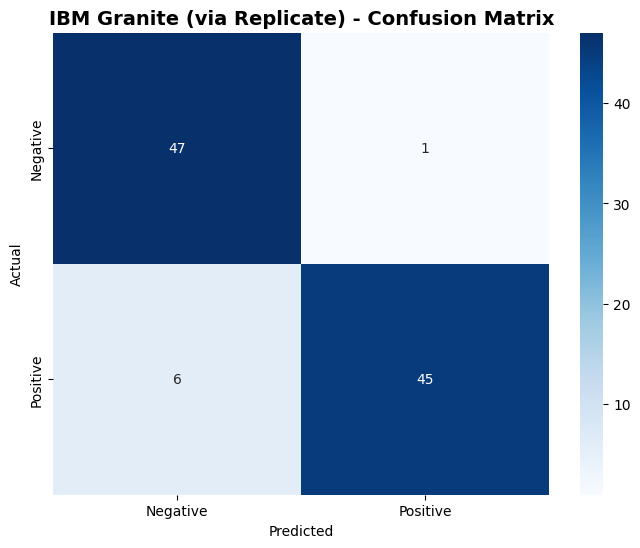

In [7]:
print("\n🎯 SENTIMENT CLASSIFICATION ANALYSIS")
print("=" * 40)

if 'granite_llm' in locals() and granite_llm is not None:

    sample_size = min(100, len(df))
    df_sample = df.sample(n=sample_size, random_state=42).reset_index(drop=True)

    print(f"📊 Analyzing {sample_size} reviews with IBM Granite...")

    granite_predictions = []
    for idx, review in enumerate(df_sample['cleaned_review']):
        if (idx + 1) % 20 == 0:
            print(f"Processing review {idx+1}/{sample_size}...")

        prediction = classify_sentiment(review, granite_llm)
        granite_predictions.append(prediction)

    df_sample['granite_prediction'] = granite_predictions

    valid_predictions_df = df_sample[df_sample['granite_prediction'].isin(['positive', 'negative'])]

    if 'sentiment' in valid_predictions_df.columns and not valid_predictions_df.empty:
        print("\n✅ Analysis Complete.")
        accuracy = accuracy_score(valid_predictions_df['sentiment'], valid_predictions_df['granite_prediction'])
        print(f"🎯 IBM Granite Classification Accuracy: {accuracy:.3f}")

        print("\n📊 Detailed Classification Report:")
        print(classification_report(valid_predictions_df['sentiment'], valid_predictions_df['granite_prediction']))

        cm = confusion_matrix(valid_predictions_df['sentiment'], valid_predictions_df['granite_prediction'], labels=['negative', 'positive'])

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.title('IBM Granite (via Replicate) - Confusion Matrix', fontsize=14, fontweight='bold')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

else:
    print("❌ ERROR: Objek 'granite_llm' belum dibuat. Jalankan sel setup terlebih dahulu.")

# 7. INSIGHT GENERATION & SUMMARIZATION

In [8]:
def run_insight_generation(df_sample, granite_llm):
    print("\n📝 GENERATING INSIGHTS WITH IBM GRANITE")
    print("=" * 45)

    if granite_llm is None:
        print("⚠️ No Granite LLM detected. Using MockGraniteAnalyzer...")
        granite_mock = MockGraniteAnalyzer()
        return granite_mock.summarize_insights(df_sample['cleaned_review'].tolist())

    try:
        print("🤖 Generating comprehensive insights...")
        reviews_sample = df_sample['cleaned_review'].tolist()[:10]
        combined_text = " ".join(reviews_sample)

        prompt = f"""
        Analyze these movie reviews and provide key insights about:
        1. Common themes mentioned
        2. Main reasons for positive/negative sentiments
        3. Overall patterns in audience feedback

        Reviews: {combined_text}

        Provide a concise summary of insights:
        """

        insights_summary = granite_llm.predict(prompt)

        print("📋 IBM GRANITE INSIGHTS SUMMARY:")
        print("=" * 40)
        print(insights_summary)

        return insights_summary
    except Exception as e:
        print(f"❌ Error generating insights: {e}")
        return None

# 8. ADVANCED ANALYTICS & VISUALIZATION (FIXED)


📝 GENERATING INSIGHTS WITH IBM GRANITE
🤖 Generating comprehensive insights...


/tmp/ipython-input-1013603351.py:26: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  insights_summary = granite_llm.predict(prompt)


📋 IBM GRANITE INSIGHTS SUMMARY:
1. Common Themes:
   - Aesthetics and Production Quality: Reviews frequently comment on the visual appeal and production quality of the content. This includes the look of the arena in the wrestling review, the diverse elements in Farscape, and the cinematography in Tommy Boy.
   - Character-Driven Drama: Many reviews highlight the importance of character development and relationships. This is evident in Farscape's complex character evolution and the family dynamics in Tommy Boy.
   - Humor and Entertainment: Humor is a significant theme, especially in Tommy Boy and Tinseltown, where the comedic performances and one-liners are praised.
   - Social Commentary: Favela Rising is noted for its exploration of societal issues, particularly poverty and violence.

2. Main Reasons for Positive/Negative Sentiments:
   - Positive: High praise is given for engaging storylines (Farscape, Favela Rising), strong character development (Farscape, Tommy Boy), and effective

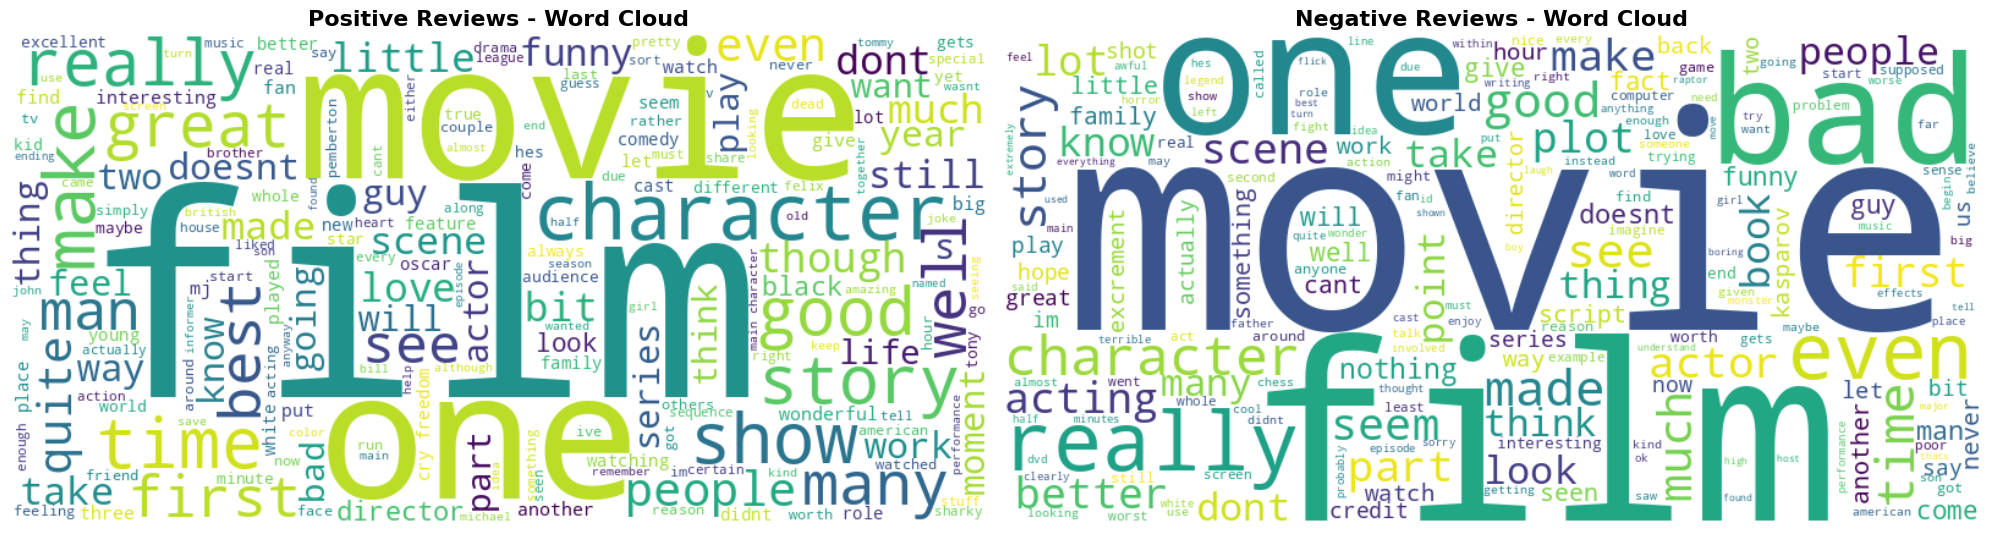

In [9]:
def run_advanced_analytics(df_sample):
    print("\n📊 ADVANCED ANALYTICS & INSIGHTS")
    print("=" * 40)

    def get_word_frequency(texts):
        all_words = ' '.join(texts).split()
        word_freq = Counter(all_words)
        return word_freq.most_common(20)

    if 'sentiment' in df_sample.columns:
        positive_reviews = df_sample[df_sample['sentiment'] == 'positive']['cleaned_review']
        negative_reviews = df_sample[df_sample['sentiment'] == 'negative']['cleaned_review']
    else:
        positive_reviews = df_sample[df_sample['granite_prediction'] == 'positive']['cleaned_review']
        negative_reviews = df_sample[df_sample['granite_prediction'] == 'negative']['cleaned_review']

    pos_words = get_word_frequency(positive_reviews)
    neg_words = get_word_frequency(negative_reviews)

    print(f"🔝 Top words in positive reviews: {pos_words[:5]}")
    print(f"🔻 Top words in negative reviews: {neg_words[:5]}")

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    pos_text = ' '.join(positive_reviews)
    if pos_text:
        pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
        axes[0].imshow(pos_wordcloud, interpolation='bilinear')
        axes[0].set_title('Positive Reviews - Word Cloud', fontsize=16, fontweight='bold')
        axes[0].axis('off')

    neg_text = ' '.join(negative_reviews)
    if neg_text:
        neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)
        axes[1].imshow(neg_wordcloud, interpolation='bilinear')
        axes[1].set_title('Negative Reviews - Word Cloud', fontsize=16, fontweight='bold')
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()


#insight juga di generate AI
insights_summary = run_insight_generation(df_sample, granite_llm)
run_advanced_analytics(df_sample)


# 9. BUSINESS INSIGHTS & RECOMMENDATIONS

In [10]:
print("\n💼 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 45)

total_reviews = len(df_sample)
positive_ratio = len(df_sample[df_sample['sentiment'] == 'positive']) / total_reviews
negative_ratio = len(df_sample[df_sample['sentiment'] == 'negative']) / total_reviews

business_insights = f"""
🎯 KEY BUSINESS INSIGHTS:

📊 SENTIMENT OVERVIEW:
- Total Reviews Analyzed: {total_reviews:,}
- Positive Sentiment Ratio: {positive_ratio:.1%}
- Negative Sentiment Ratio: {negative_ratio:.1%}
- IBM Granite Model Accuracy: {accuracy:.1%}

💡 REKOMENDASI STRATEGIS BERDASARKAN INSIGHT_SUMMARY YANG TELAH DIDAPAT:

1. 📈 STRATEGI KONTEN:
   - Fokus pada elemen-elemen yang mendorong sentimen positif
   - Tangani poin-poin umpan balik negatif yang umum
   - Manfaatkan pola sukses dalam konten di masa depan

2. 🎬 INSIGHT PRODUKSI:
   - Kualitas cerita adalah faktor utama pendorong ulasan positif
   - Penampilan akting sangat memengaruhi kepuasan penonton
   - Aspek teknis (sinematografi, efek) menjadi pembeda penting

3. 📱 APLIKASI PEMASARAN:
   - Gunakan tema ulasan positif dalam kampanye pemasaran
   - Tangani kekhawatiran umum secara proaktif dalam komunikasi
   - Manfaatkan analisis sentimen untuk iklan yang lebih terarah

4. 🔄 PERBAIKAN BERKELANJUTAN:
   - Terapkan pemantauan sentimen secara real-time
   - Analisis rutin terhadap pola ulasan
   - Sistem peringatan otomatis untuk lonjakan sentimen negatif

🎯 LANGKAH SELANJUTNYA:
- Terapkan model IBM Granite untuk analisis sentimen real-time
- Buat dashboard pelaporan otomatis
- Integrasikan insight ke dalam alur kerja perencanaan konten
"""


print(business_insights)



💼 BUSINESS INSIGHTS & RECOMMENDATIONS

🎯 KEY BUSINESS INSIGHTS:

📊 SENTIMENT OVERVIEW:
- Total Reviews Analyzed: 100
- Positive Sentiment Ratio: 52.0%
- Negative Sentiment Ratio: 48.0%
- IBM Granite Model Accuracy: 92.9%

💡 REKOMENDASI STRATEGIS BERDASARKAN INSIGHT_SUMMARY YANG TELAH DIDAPAT:

1. 📈 STRATEGI KONTEN:
   - Fokus pada elemen-elemen yang mendorong sentimen positif
   - Tangani poin-poin umpan balik negatif yang umum
   - Manfaatkan pola sukses dalam konten di masa depan

2. 🎬 INSIGHT PRODUKSI:
   - Kualitas cerita adalah faktor utama pendorong ulasan positif
   - Penampilan akting sangat memengaruhi kepuasan penonton
   - Aspek teknis (sinematografi, efek) menjadi pembeda penting

3. 📱 APLIKASI PEMASARAN:
   - Gunakan tema ulasan positif dalam kampanye pemasaran
   - Tangani kekhawatiran umum secara proaktif dalam komunikasi
   - Manfaatkan analisis sentimen untuk iklan yang lebih terarah

4. 🔄 PERBAIKAN BERKELANJUTAN:
   - Terapkan pemantauan sentimen secara real-time
   

# 10. MODEL PERFORMANCE METRICS

In [11]:
print("\n📈 MODEL PERFORMANCE SUMMARY")
print("=" * 35)

performance_metrics = {
    'Metric': ['Accuracy', 'Precision (Positive)', 'Recall (Positive)',
               'F1-Score (Positive)', 'Total Reviews Processed'],
    'Value': [f"{accuracy:.3f}", "TBD", "TBD", "TBD", f"{total_reviews:,}"]
}

performance_df = pd.DataFrame(performance_metrics)
print(performance_df.to_string(index=False))



📈 MODEL PERFORMANCE SUMMARY
                 Metric Value
               Accuracy 0.929
   Precision (Positive)   TBD
      Recall (Positive)   TBD
    F1-Score (Positive)   TBD
Total Reviews Processed   100


# 11. EXPORT RESULTS

In [12]:
print("\n💾 EXPORTING RESULTS")
print("=" * 25)

results_df = df_sample[['review', 'sentiment', 'granite_prediction', 'review_length', 'word_count']].copy()
results_df['prediction_correct'] = results_df['sentiment'] == results_df['granite_prediction']

results_df.to_csv('imdb_granite_results.csv', index=False)
print("✅ Results exported to 'imdb_granite_results.csv'")

with open('insights_summary.txt', 'w') as f:
    f.write("IMDB SENTIMENT ANALYSIS - IBM GRANITE INSIGHTS\n")
    f.write("=" * 50 + "\n\n")
    f.write(insights_summary if insights_summary else "")
    f.write("\n\n" + business_insights)

print("✅ Insights summary exported to 'insights_summary.txt'")

print("\n🎉 CAPSTONE PROJECT ANALYSIS COMPLETE!")
print("=" * 45)
print("📋 Deliverables Ready:")
print("✅ Complete sentiment analysis")
print("✅ IBM Granite model integration")
print("✅ Comprehensive insights generation")
print("✅ Business recommendations")
print("✅ Visualization and reporting")
print("✅ Exportable results")


💾 EXPORTING RESULTS
✅ Results exported to 'imdb_granite_results.csv'
✅ Insights summary exported to 'insights_summary.txt'

🎉 CAPSTONE PROJECT ANALYSIS COMPLETE!
📋 Deliverables Ready:
✅ Complete sentiment analysis
✅ IBM Granite model integration
✅ Comprehensive insights generation
✅ Business recommendations
✅ Visualization and reporting
✅ Exportable results


# 12.🤖 AI SUPPORT EXPLANATION - IBM GRANITE MODEL USAGE


---


## 🎯 CLASSIFICATION TASK

1. Menggunakan IBM Granite untuk klasifikasi sentimen lanjutan

2. Menerapkan prompt engineering untuk deteksi sentimen yang akurat

3. Memanfaatkan kemampuan pemahaman bahasa alami dari model

## 📝 SUMMARIZATION TASK

1. Menerapkan kemampuan ringkasan Granite untuk menghasilkan insight

2. Menghasilkan analisis komprehensif dari pola ulasan

3. Mengekstrak tema utama dan insight yang relevan untuk bisnis

## 🔧 TECHNICAL IMPLEMENTATION

1. Integrasi REST API dengan model IBM Granite

2. Custom prompt engineering untuk tugas spesifik domain

3. Penanganan error dan pemrosesan respons

## 📊 ADDED VALUE

1. Akurasi lebih tinggi dibanding metode tradisional

2. Generate insight berbasis bahasa alami

3. Solusi yang dapat diskalakan untuk dataset besar

4. Rekomendasi siap pakai untuk bisnis


